# LIBRARY

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV , train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score,classification_report,roc_auc_score,precision_score,confusion_matrix,recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings('ignore')

# Loading Data

In [2]:
df = pd.read_csv("Fraud.csv")

In [3]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


# Taking Sample

In [4]:
df_sample, _ = train_test_split(df,test_size=0.92141601,random_state=1234,stratify=df["isFraud"])

In [5]:
df_sample.shape

(500000, 11)

# Train - Test Split

In [6]:
df_train , df_test = train_test_split(df_sample , test_size=0.2,random_state=123,stratify=df_sample["isFraud"])
df_train , df_val = train_test_split(df_train , test_size=0.25,random_state=123,stratify=df_train["isFraud"])

In [7]:
df_train.shape

(300000, 11)

In [8]:
df_test.shape

(100000, 11)

In [9]:
df_val.shape

(100000, 11)

# EDA

In [10]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 300000 entries, 486548 to 4214666
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   step            300000 non-null  int64  
 1   type            300000 non-null  object 
 2   amount          300000 non-null  float64
 3   nameOrig        300000 non-null  object 
 4   oldbalanceOrg   300000 non-null  float64
 5   newbalanceOrig  300000 non-null  float64
 6   nameDest        300000 non-null  object 
 7   oldbalanceDest  300000 non-null  float64
 8   newbalanceDest  300000 non-null  float64
 9   isFraud         300000 non-null  int64  
 10  isFlaggedFraud  300000 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 27.5+ MB


In [11]:
df_train.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [12]:
#drop duplicates
df_train.drop_duplicates(keep=False , inplace=True)

In [13]:
df_train.shape

(300000, 11)

In [14]:
df_train.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,300000.000000,3.000000e+05,3.000000e+05,3.000000e+05,3.000000e+05,3.000000e+05,300000.000000,300000.000000
mean,243.518963,1.797030e+05,8.336019e+05,8.549314e+05,1.097957e+06,1.221330e+06,0.001290,0.000003
std,141.901298,6.022078e+05,2.895000e+06,2.930307e+06,3.346001e+06,3.621448e+06,0.035893,0.001826
min,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,156.000000,1.324180e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
50%,239.000000,7.426901e+04,1.392974e+04,0.000000e+00,1.305861e+05,2.120638e+05,0.000000,0.000000
75%,334.000000,2.077247e+05,1.068955e+05,1.439608e+05,9.426017e+05,1.111275e+06,0.000000,0.000000
max,742.000000,5.512957e+07,3.741827e+07,3.498450e+07,3.114049e+08,3.114929e+08,1.000000,1.000000


# 1 Is Fraud

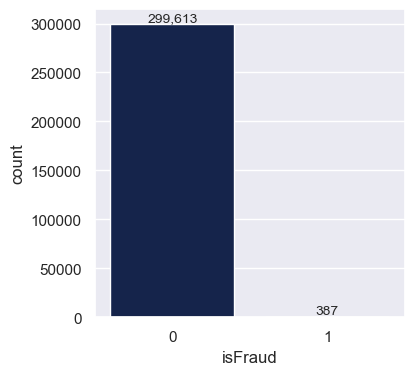

In [15]:
plt.figure(figsize=(4, 4))
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="isFraud", data=df_train, color="#0c2054")

# Annotate each bar with the count value
for p in ax.patches:
    # Annotate with the count value above the bars
    ax.annotate(
        str(format(int(p.get_height()), ",d")),  # formatted count value
        (p.get_x() + p.get_width() / 2, p.get_height()),  # position of annotation
        ha="center",  # horizontal alignment
        va="bottom",  # vertical alignment
        fontsize=10
    )


# 2 IsFlaggedFraud

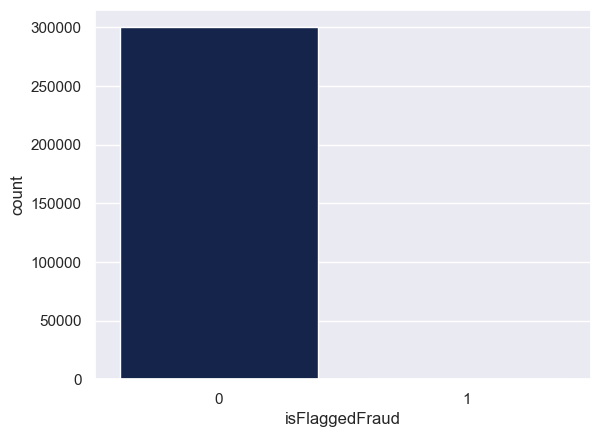

In [16]:
df_train['isFlaggedFraud'].value_counts()
sns.set_theme(style = 'darkgrid')
ac = sns.countplot(x='isFlaggedFraud', data = df_train,color = "#0c2054")
for p in ax.patches:
    ax.annotate(str(format(int(p.get_height()), ',d')),
                (p.get_x(),p.get_height())
    )

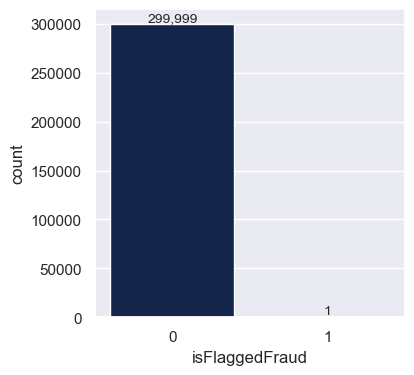

In [17]:
plt.figure(figsize=(4, 4))
df_train['isFlaggedFraud'].value_counts()
sns.set_theme(style="darkgrid")
ax = sns.countplot(x='isFlaggedFraud', data=df_train, color="#0c2054")

for p in ax.patches:
    ax.annotate(
        str(format(int(p.get_height()), ",d")), 
        (p.get_x() + p.get_width() / 2, p.get_height()), 
        ha="center", 
        va="bottom", 
        fontsize=10
    )


# 3 Type

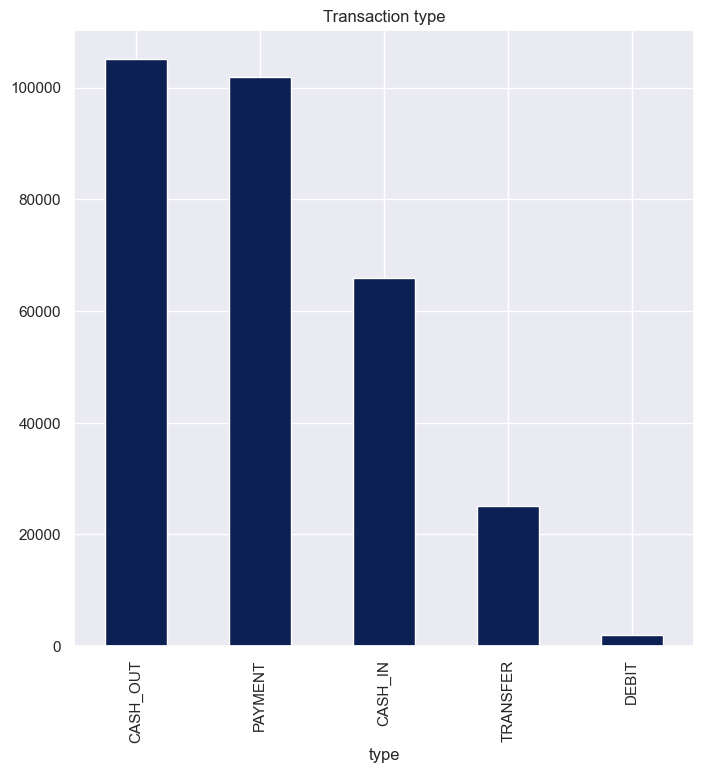

In [18]:
f ,ax = plt.subplots(1,1,figsize=(4,4))
df_train.type.value_counts().plot(kind='bar',title='Transaction type',ax=ax,figsize=(8,8),color="#0c2054")
plt.ticklabel_format(style='plain',axis='y')

In [19]:
pd.crosstab(df_train["type"],df_train['isFraud']) #crosstab :segregations based on that particulaar classificstion

isFraud,0,1
type,,
CASH_IN,65987,0
CASH_OUT,104850,192
DEBIT,1955,0
PAYMENT,101920,0
TRANSFER,24901,195


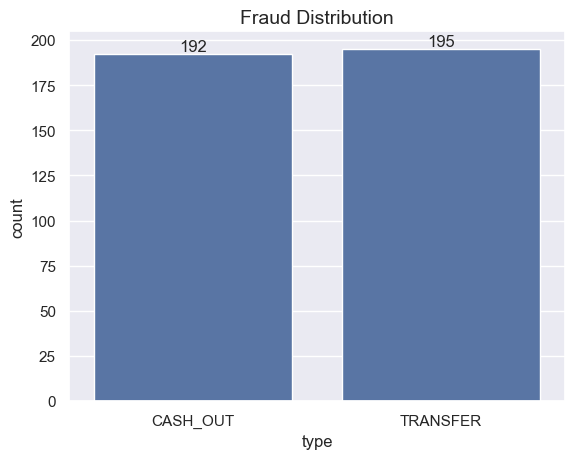

In [20]:
ax = sns.countplot(x='type', data=df_train[df_train['isFraud']==1])
plt.title("Fraud Distribution",fontsize=14)

for p in ax.patches:
    ax.annotate(
        str(format(int(p.get_height()),',d')),
        (p.get_x() + p.get_width()/2. , p.get_height()),
        ha='center',
        va='bottom'
    )
plt.show()

# 4 -Step

In [21]:
fraud = df_train[df_train["isFraud"]==1]
Notfraud =  df_train[df_train["isFraud"]==0]

In [22]:
Notfraud['transactionHour'] = Notfraud['step'] %24
fraud['transactionHour'] = fraud['step'] %24

# Distribution of not fraud

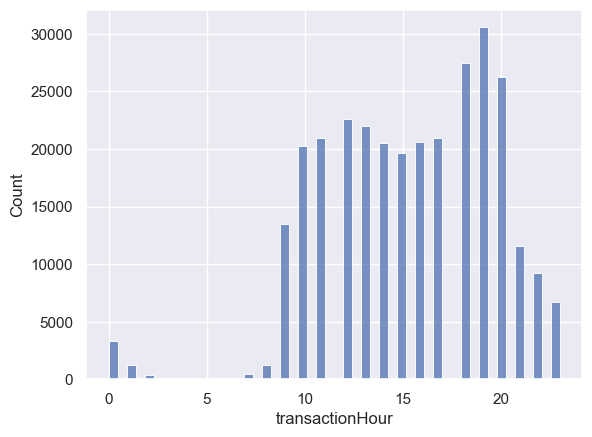

In [23]:
sns.histplot(data = Notfraud,
            x='transactionHour',
            bins=50);

# Distribution of  fraud

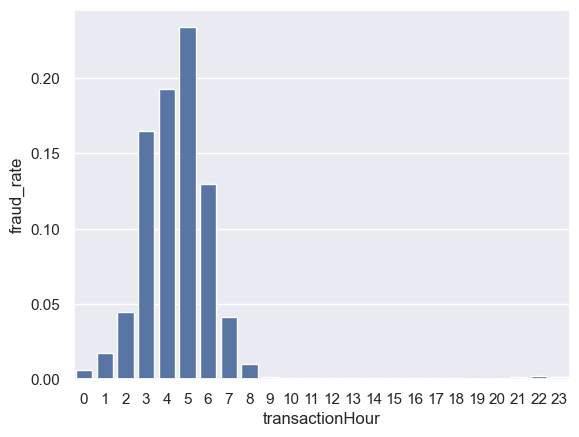

In [24]:
df_train['transactionHour'] = df_train['step'] % 24
frauds_hour = pd.concat([df_train.groupby("transactionHour")["isFraud"].sum(),
                         df_train.groupby("transactionHour")["isFraud"].count()],axis=1)
frauds_hour.columns = ["Frauds","Transactions"]
frauds_hour["fraud_rate"] = frauds_hour.Frauds/frauds_hour.Transactions
sns.barplot(x=frauds_hour.index,y=frauds_hour.fraud_rate)
plt.show()

In [25]:
df_train["transactionHour"] = df_train["transactionHour"].astype('object')

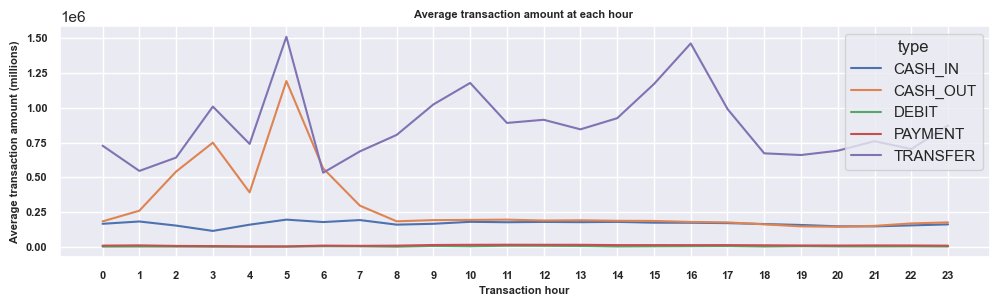

In [26]:

plt.figure(figsize=(12,3))
sns.lineplot(data=df_train.groupby(["transactionHour" , "type"]).agg({"amount":"mean"}).round(2).reset_index(),
             x="transactionHour",
             y="amount",
             hue="type"
            )
plt.xlabel("Transaction hour ",fontsize=8,fontweight='bold')
plt.xticks(range(24),range(24),fontsize=8,fontweight="bold",rotation=0)
plt.ylabel("Average transaction amount (millions)" , fontsize=8, fontweight="bold")
plt.yticks(fontsize=8,fontweight="bold")
plt.title("Average transaction amount at each hour ",fontsize=8,fontweight="bold")
plt.show()

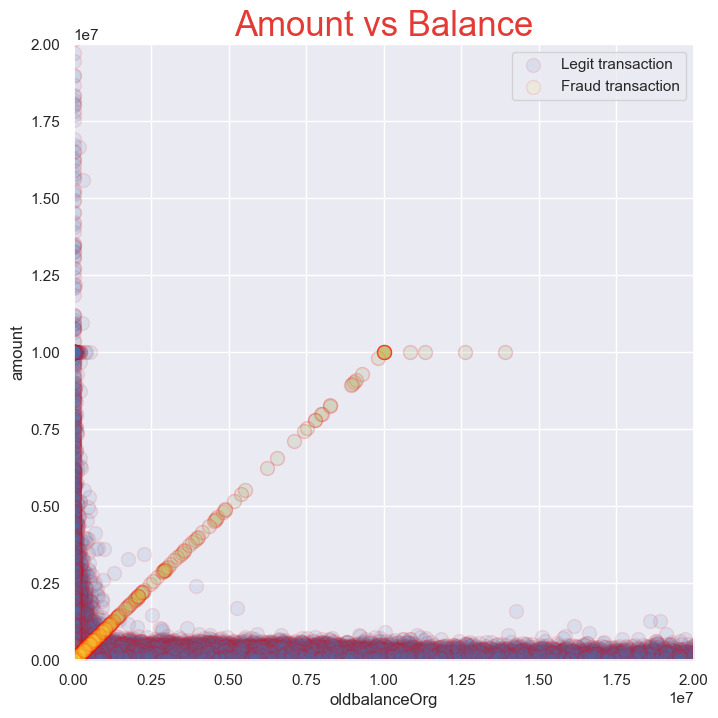

In [27]:
newscatplot = df_train[df_train["isFraud"] == 1] 


plt.figure(figsize=(8, 8)) 
ax = plt.gca()
ax.set_ylim(0, 2 * 1e7) 
ax.set_xlim(0, 2 * 1e7)  

df_train.plot.scatter(
    x="oldbalanceOrg",
    y="amount",
    ax=ax,
    edgecolors="red",
    s=100,
    alpha=0.1,
    label="Legit transaction"  
)

newscatplot.plot.scatter(
    x="oldbalanceOrg",
    y="amount",
    color="#FCD735",
    ax=ax,
    edgecolors="red",
    s=100,
    alpha=0.1,
    label="Fraud transaction"  
)

plt.title("Amount vs Balance", fontsize=25, color="#E43A36")
plt.legend()
plt.show() 

# Feature engineering

In [28]:
df_train  = df_train.loc[(df_train.type == "TRANSFER") | (df_train.type == "CASH_OUT")]

In [29]:
df_train["errorbalanceOrg"] = df_train.newbalanceOrig + df_train.amount - df_train.oldbalanceOrg
df_train["errorbalanceDest"] = df_train.newbalanceDest + df_train.amount - df_train.oldbalanceDest


# Base line

In [30]:
df_train = pd.concat([df_train,pd.get_dummies(df_train["type"],prefix = "type")],axis=1)

In [31]:
df_train = df_train.drop(["nameOrig","nameDest","isFlaggedFraud","type","transactionHour"],axis=1)

In [32]:
y_train = df_train["isFraud"]
X_train = df_train.drop(["isFraud"],axis=1)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


# Random Forest Classifier

In [34]:
RF = RandomForestClassifier(random_state=1)
RF.fit(X_train, y_train)


RandomForestClassifier(random_state=1)

# Train

In [35]:
y_predict = RF.predict(X_train)

In [36]:
print(classification_report(y_train, y_predict))
print(confusion_matrix(y_train,y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    129751
           1       1.00      1.00      1.00       387

    accuracy                           1.00    130138
   macro avg       1.00      1.00      1.00    130138
weighted avg       1.00      1.00      1.00    130138

[[129751      0]
 [     0    387]]


# VALIDATION

In [37]:
df_val = df_val.loc[(df_val.type == "TRANSFER") | (df_val.type == "CASH_OUT")]

df_val["errorbalanceOrg"] = df_val.newbalanceOrig + df_val.amount - df_val.oldbalanceOrg
df_val["errorbalanceDest"] = df_val.oldbalanceDest + df_val.amount - df_val.newbalanceDest

df_val = pd.concat([df_val, pd.get_dummies(df_val["type"], prefix="type")],axis=1)
df_val = df_val.drop(["nameOrig","nameDest","isFlaggedFraud","type"],axis = 1)

In [38]:
y_val = df_val["isFraud"]
X_val = df_val.drop(["isFraud"],axis=1)

In [39]:
y_predict = RF.predict(X_val)

In [40]:
print(classification_report(y_val, y_predict))
print(confusion_matrix(y_val,y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     43179
           1       1.00      1.00      1.00       129

    accuracy                           1.00     43308
   macro avg       1.00      1.00      1.00     43308
weighted avg       1.00      1.00      1.00     43308

[[43179     0]
 [    0   129]]


# Test

In [41]:
df_test = df_test.loc[(df_test.type == "TRANSFER") | (df_test.type == "CASH_OUT")]

df_test["errorbalanceOrg"] = df_test.newbalanceOrig + df_test.amount - df_test.oldbalanceOrg
df_test["errorbalanceDest"] = df_test.oldbalanceDest + df_test.amount - df_test.newbalanceDest

df_test = pd.concat([df_test, pd.get_dummies(df_test["type"], prefix="type")],axis=1)
df_test = df_test.drop(["nameOrig","nameDest","isFlaggedFraud","type"],axis = 1)

In [42]:
y_test = df_test["isFraud"]
X_test = df_test.drop(["isFraud"],axis=1)

In [43]:
y_predict = RF.predict(X_test)

In [44]:
print(classification_report(y_test, y_predict))
print(confusion_matrix(y_test,y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     43235
           1       1.00      0.99      1.00       129

    accuracy                           1.00     43364
   macro avg       1.00      1.00      1.00     43364
weighted avg       1.00      1.00      1.00     43364

[[43235     0]
 [    1   128]]
